In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from PIL import Image
import matplotlib.pyplot as plt

In [25]:
csv_file = "train_data.csv"
image_folder = "coco_data/train2017"

In [5]:
data = pd.read_csv(csv_file)

In [7]:
data = data.drop('Unnamed: 0', axis=1)

In [8]:
data

,image_path,caption
0,000000363830.jpg,A man in a red shirt and black pants resting o...
1,000000097712.jpg,A person sitting down a bench in front of the ...
2,000000428229.jpg,A work bench with bananas with wires connected...
3,000000121582.jpg,there are three men riding elephants in the field
4,000000472109.jpg,"A bathroom with a toilet, towel rack and a tub..."
...,...,...
106453,000000143847.jpg,A person stands at a railing looking over a bo...
106454,000000373960.jpg,A woman with a shopping back sitting on a benc...
106455,000000510230.jpg,A white bike with flowers on the front by a cat.
106456,000000252208.jpg,A person that is taking a picture of some anim...


In [9]:
id_to_description = dict(zip(data['image_path'], data['caption']))

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['caption'].values.astype('U'))

In [29]:
def recommend_images(query, tfidf_matrix, id_to_description, top_n=5):
    query_vector = tfidf_vectorizer.transform([query])
    cosine_similarities = linear_kernel(query_vector, tfidf_matrix).flatten()
    related_image_indices = cosine_similarities.argsort()[:-top_n-1:-1]

    recommendations = []
    for index in related_image_indices:
        image_id = data.iloc[index]['image_path']
        image_path = os.path.join(image_folder, f"{image_id}")
        recommendations.append(image_path)

    return recommendations

coco_data/train2017/000000581697.jpg
coco_data/train2017/000000382339.jpg
coco_data/train2017/000000187253.jpg
coco_data/train2017/000000119353.jpg
coco_data/train2017/000000184843.jpg


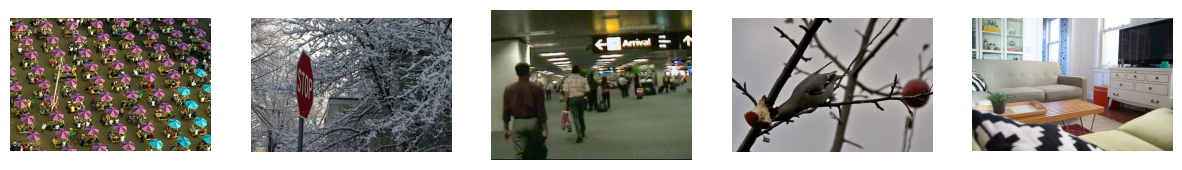

In [32]:
query = "man with ball"
recommendations = recommend_images(query, tfidf_matrix, id_to_description)

# Визуализация рекомендованных изображений
fig, axs = plt.subplots(1, len(recommendations), figsize=(15, 5))

for i, image_path in enumerate(recommendations):
    print(image_path)
    img = Image.open(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()

In [33]:
data[data['image_path'] == '000000581697.jpg']

,image_path,caption
44141,000000581697.jpg,A man catching a ball with another man next to...


In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from PIL import Image
import matplotlib.pyplot as plt

# Загрузка данных
data_path = "путь_к_вашим_данным"
csv_file = "ваш_файл.csv"
image_folder = "папка_с_изображениями"

data = pd.read_csv(os.path.join(data_path, csv_file))

# Создание отображения между идентификаторами и описаниями
id_to_description = dict(zip(data['id'], data['description']))

# Преобразование описаний в матрицу TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'].values.astype('U'))

# Функция для получения рекомендаций на основе описания
def recommend_images(query, tfidf_matrix, id_to_description, top_n=5):
    query_vector = tfidf_vectorizer.transform([query])
    cosine_similarities = linear_kernel(query_vector, tfidf_matrix).flatten()
    related_image_indices = cosine_similarities.argsort()[:-top_n-1:-1]

    recommendations = []
    for index in related_image_indices:
        image_id = data.iloc[index]['id']
        image_path = os.path.join(image_folder, f"{image_id}.jpg")
        recommendations.append(image_path)

    return recommendations

# Пример использования
query = "ваш запрос для рекомендации"
recommendations = recommend_images(query, tfidf_matrix, id_to_description)

# Визуализация рекомендованных изображений
fig, axs = plt.subplots(1, len(recommendations), figsize=(15, 5))

for i, image_path in enumerate(recommendations):
    img = Image.open(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()